# Initial visualization

Simple initial data visualization.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Render plots in notebook
%matplotlib inline

data_dir = "./extracted"
boot_times_path = "{}/boot_times.csv".format(data_dir)
bandwidth_path = "{}/bandwidth_results.csv".format(data_dir)
jitter_path = "{}/jitter_results.csv".format(data_dir)
fileior_path = "{}/fileio_read_results.csv".format(data_dir)
fileiow_path  ="{}/fileio_write_results.csv".format(data_dir)
cpu_path = "{}/cpu_results.csv".format(data_dir)
http_path = "{}/http_benchmark_results.csv".format(data_dir)
pipeline_path = "{}/pipeline_results.csv".format(data_dir)
database_path = "{}/database_results.csv".format(data_dir)

MARKERS = ("o", "s", "x", "v", "+")


## Boot times

Mean boot times per platform.

Text(0, 0.5, 'Seconds')

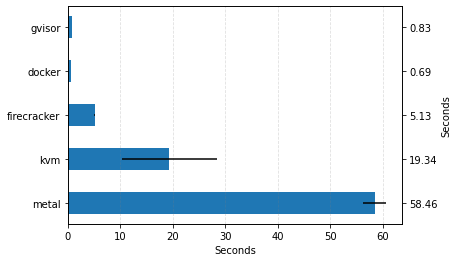

In [2]:
df = pd.read_csv(boot_times_path)
df_mean = df.mean()
df_std = df.std()

fig, ax = plt.subplots()
pos = np.arange(len(df_mean))
rects = ax.barh(pos, df_mean,
    align="center",
    height=0.5,
    tick_label=df_mean.index,
    xerr=df_std)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Seconds")
# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in df_mean])
axr.set_ylabel("Seconds")


## Bandwidth and jitter

Mean network bandwidth and jitter.

### Bandwidth

Bandwidth bit / second and CPU usage percentage with TCP traffic.

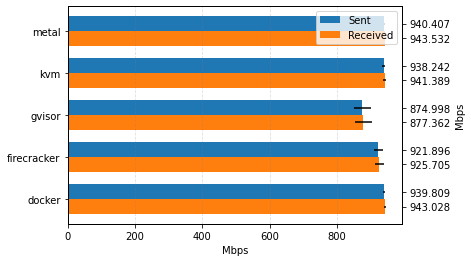

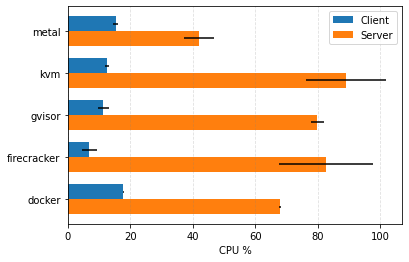

In [3]:
df = pd.read_csv(bandwidth_path)

conv_bps_to_mebibps = 1.0e-6

sent_mbps = "sent_mbps"
received_mbps = "received_mbps"

df[sent_mbps] = df.apply(lambda row: row['sent_bps'] * conv_bps_to_mebibps, axis=1)
df[received_mbps] = df.apply(lambda row: row['received_bps'] * conv_bps_to_mebibps, axis=1)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Send and received bps
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos + height / 2, group_mean[sent_mbps],
    align="center",
    height=height,
    xerr=group_std[sent_mbps],
    label="Sent")
rects2 = ax.barh(pos - height / 2, group_mean[received_mbps],
    align="center",
    height=height,
    xerr=group_std[received_mbps],
    label="Received")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Mbps")
ax.set_xlim()
ax.legend()


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos + height / 2)
axr.set_yticklabels(["{:.3f}".format(val) for val in group_mean[sent_mbps]])
axr.set_ylabel("Mbps")

axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos - height / 2)
axr.set_yticklabels(["{:.3f}".format(val) for val in group_mean[received_mbps]])


# CPU
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos + height / 2, group_mean["cpu_client"],
    align="center",
    height=height,
    xerr=group_std["cpu_client"],
    label="Client")
rects2 = ax.barh(pos - height / 2, group_mean["cpu_server"],
    align="center",
    height=height,
    xerr=group_std["cpu_server"],
    label="Server")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("CPU %")
ax.legend()




### Jitter

Network jitter with UDP traffic.

Text(0, 0.5, 'ms')

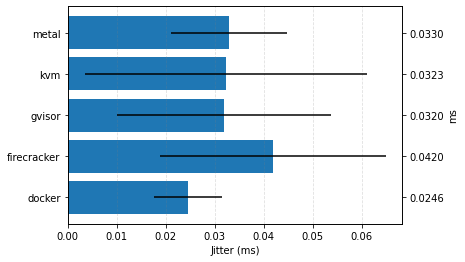

In [4]:
df = pd.read_csv(jitter_path)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean["jitter_ms"],
    align="center",
    xerr=group_std["jitter_ms"],
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Jitter (ms)")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.4f}".format(val) for val in group_mean["jitter_ms"]])
axr.set_ylabel("ms")



## File I/O

Filesystem I/O read and write results (bytes per second).

Text(0, 0.5, 'MiB/s')

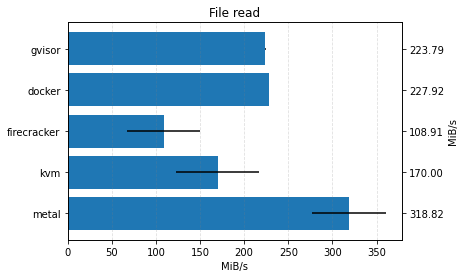

In [5]:
df = pd.read_csv(fileior_path)

# ax = df.mean().plot.bar()
# ax.set_xlabel("Platform")
# ax.set_ylabel("File read MiB/s")

group_mean = df.mean()
group_std = df.std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
ax.set_title("File read")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean,
    align="center",
    xerr=group_std,
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("MiB/s")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean])
axr.set_ylabel("MiB/s")


Text(0, 0.5, 'MiB/s')

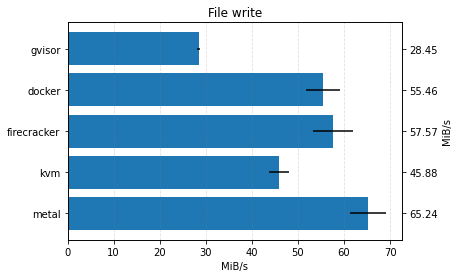

In [6]:
df = pd.read_csv(fileiow_path)

group_mean = df.mean()
group_std = df.std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
ax.set_title("File write")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean,
    align="center",
    xerr=group_std,
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("MiB/s")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean])
axr.set_ylabel("MiB/s")

## CPU

Mean CPU `sysbench` events / second per platform.

Text(0, 0.5, 'Events per second')

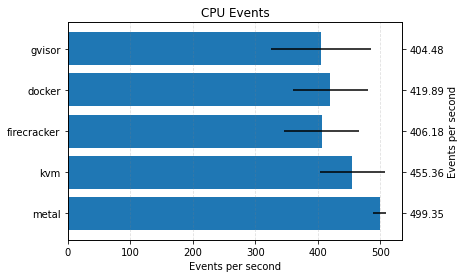

In [7]:
df = pd.read_csv(cpu_path)

group_mean = df.mean()
group_std = df.std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
ax.set_title("CPU Events")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean,
    align="center",
    xerr=group_std,
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Events per second")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean])
axr.set_ylabel("Events per second")


## HTTP Benchmark

HTTP benchmark results.

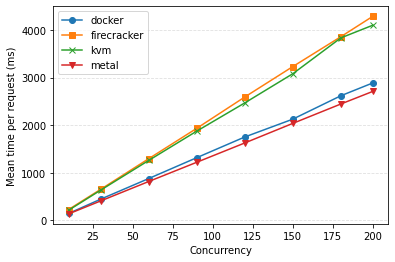

In [8]:
df = pd.read_csv(http_path)

fig, ax = plt.subplots()

df_mean = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="mean_time_per_req"
)

ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Mean time per request (ms)")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()


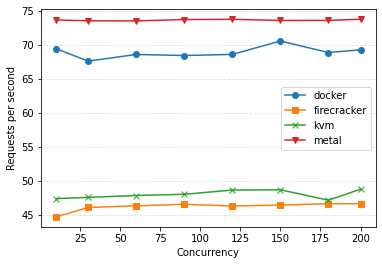

In [9]:
df = pd.read_csv(http_path)

fig, ax = plt.subplots()

df_mean = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="req_per_sec"
)
ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Requests per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()

## Pipeline results

Build pipeline results.

Text(0, 0.5, 'Seconds')

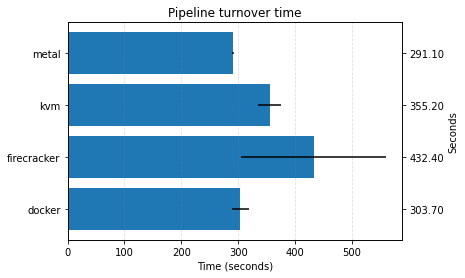

In [10]:
df = pd.read_csv(pipeline_path)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35
# Jitter
fig, ax = plt.subplots()
ax.set_title("Pipeline turnover time")
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean["time_seconds"],
    align="center",
    xerr=group_std["time_seconds"],
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Time (seconds)")


# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in group_mean["time_seconds"]])
axr.set_ylabel("Seconds")

## Database

Database performance results.

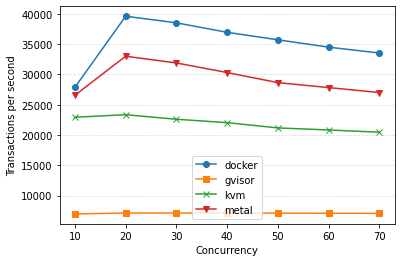

In [11]:
df = pd.read_csv(database_path)

read_only = df[df.write_queries.eq(0)]

ax.set_ylabel("Transactions per second")

fig, ax = plt.subplots()

df_mean = read_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="transactions"
)


ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()


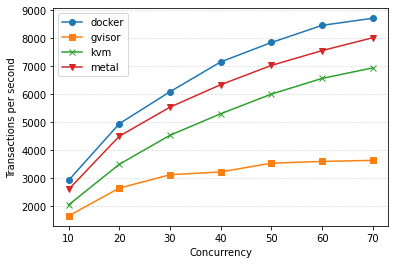

In [12]:
write_only = df[df.read_queries.eq(0)]

fig, ax = plt.subplots()

df_mean = write_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="transactions"
)

ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()

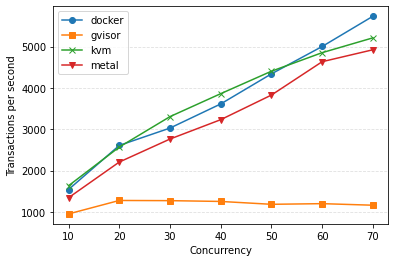

In [13]:
read_write = df[df.write_queries.ne(0) & df.read_queries.ne(0)]
fig, ax = plt.subplots()

df_mean = read_write.groupby(["platform", "concurrency"]).mean().reset_index().pivot(
    index="concurrency", columns="platform", values="transactions"
)
ax.yaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")

i = 0
for column in df_mean:
    ax.plot(df_mean[column], marker=MARKERS[i], label=column)
    i += 1

ax.legend()